In [1]:
import numpy as np
import pandas as pd

#visualisation
import seaborn as sns
import matplotlib.pylab as plt

#PCA
from sklearn import StandardScaler
from sklearn.decomposition import PCA

ImportError: cannot import name 'StandardScaler' from 'sklearn' (/Users/pete/opt/anaconda3/lib/python3.8/site-packages/sklearn/__init__.py)

In [13]:
data = pd.read_csv("final_df_descriptos.csv", encoding = "ISO-8859-1")
display(data.head())

,Standardised_Smiles,AM1_E,AM1_Eele,AM1_HF,AM1_HOMO,AM1_IP,AM1_LUMO,AM1_dipole,ASA,ASA+,...,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,weinerPath,weinerPol,zagreb,Target
0,Oc1c(Cl)cc(Cl)cc1Sc1cc(Cl)cc(Cl)c1O,-91061.594,-490900.38,-54.180599,-9.08072,9.08072,-0.86114,1.984315,493.96982,116.66142,...,59.125,3.750,0.75,0.000,0.000,0.0,688,30,98,0
1,CCCCCC1C(=O)CCC1CC(=O)O,-64010.746,-377504.44,-181.891950,-10.37975,10.37975,0.76110,1.842890,458.93463,320.75201,...,31.375,6.625,2.75,0.625,0.125,0.0,400,17,68,0
2,Cc1cc(=O)n(-c2ccccc2)n1C,-53151.840,-302296.66,64.051399,-8.76044,8.76044,-0.17180,4.432582,392.48480,232.39806,...,16.000,0.000,0.00,0.000,0.000,0.0,284,20,72,0
3,O=C(C=CC=Cc1ccc2c(c1)OCO2)N1CCCCC1,-83131.195,-527420.63,-51.748039,-8.66869,8.66869,-0.80507,2.895411,548.17822,370.79236,...,20.000,0.000,0.00,0.000,0.000,0.0,1131,27,106,0
4,O=c1ccc2cc(OC3OC(CO)C(O)C(O)C3O)c(O)cc2o1,-115882.230,-774507.50,-348.088130,-9.29644,9.29644,-1.18028,4.948146,522.75287,310.44724,...,94.625,18.375,4.75,0.625,0.000,0.0,1339,42,128,0


In [14]:
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

## PCA 

In [15]:
descriptors_std = StandardScaler().fit_transform(X)

In [16]:
pca = PCA(n_components=2)
print(X.shape)
res = pca.fit_transform(descriptors_std)
print(res.shape)

(1430, 354)
(1430, 2)


In [23]:
principal = pd.DataFrame(data = res
             , columns = ['PC_1', 'PC_2'])

finalPCA = pd.concat([principal,  data[['Target']]], axis = 1)

display(finalPCA.head())

,PC_1,PC_2,Target
0,-2.815871,-3.917015,0
1,-4.978448,-0.271778,0
2,-8.871983,-4.891291,0
3,-1.270698,-6.003349,0
4,3.756103,10.166345,0


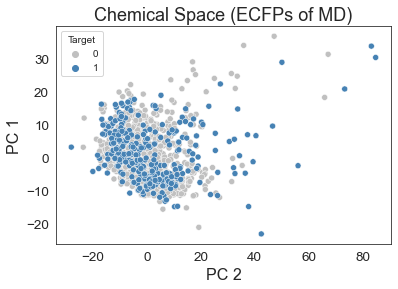

In [25]:
ax = sns.scatterplot(data=finalPCA, x='PC_1', y='PC_2', hue = 'Target', palette= colours)

plt.ylabel('PC 1',fontsize=16)
plt.xlabel('PC 2',fontsize=16)
plt.title('Chemical Space (ECFPs of MD)', fontsize= 18)
plt.xticks(fontsize=13.5)
plt.yticks(fontsize=13.5)

plt.show()